<a href="https://colab.research.google.com/github/ElenaKapetanoudi/Machine-Learning-Exercise-5/blob/main/Exercise_5_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

# Part 1 - KNN

## Question 1

### Load Dataset

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Question 2

### Digits Selection

In [ ]:
digits =[]
for digit in range(10):
  indices = np.where(y_train == digit)[0]
  choice = np.random.choice(indices)
  digits.append(x_train[choice])

### Display Plot For Each Digit

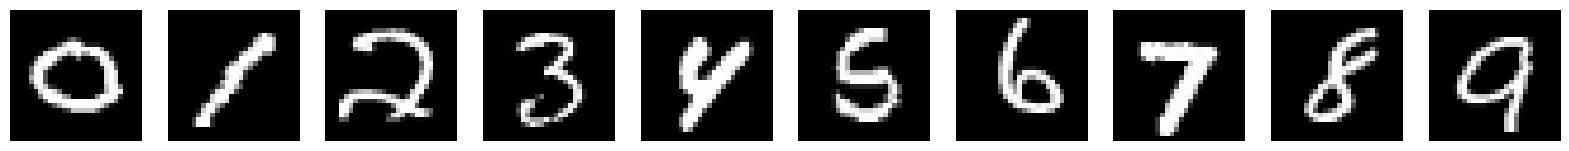

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
  axes[i].imshow(digits[i], cmap='gray')
  axes[i].axis('off')
plt.show()

## Question 3

### Observation

Παρατηρούμε από το πρώτο ερώτημα ότι το μέγεθος κάθε εικόνας στο MNIST είναι 28x28 = 784 pixels. Επιπλέον, η κάθε εικόνα έχει ένα κανάλι, δηλαδή είναι ασπρόμαυρη, με τις τιμές των pixel να κυμαίνονται από 0 (μαύρο) έως 255 (άσπρο).
Γνωρίζουμε ότι τα ψηφία βρίσκονται στη μέση κάθε εικόνας και γύρω από αυτά υπάρχουν πολλά μαύρα pixels.
Τα περιθωριακά αυτά pixels δεν θεωρούνται σημαντικά, διότι αν τα αφαιρέσουμε η ακρίβεια του ταξινομητή δεν θα επηρεαστεί σημαντικά. Αντίθετα, ουσιαστική πληροφορία παρέχουν τα pixel που συνεισφέρουν στο σχήμα του ψηφίου.

## Question 4

### Images To Vectors Conversion

In [ ]:
x_train_vector = x_train.reshape(x_train.shape[0], 28 * 28)
x_test_vector = x_test.reshape(x_test.shape[0], 28 * 28)

x_train_vector.shape, x_test_vector.shape

((60000, 784), (10000, 784))

### PCA For Dimensionality Reduction

In [ ]:
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(x_train_vector)
x_test_pca = pca.transform(x_test_vector)

x_train_pca.shape, x_test_pca.shape

((60000, 20), (10000, 20))

## Question 5

### KNeighbors Classifier Training

In [ ]:
N = x_train_pca.shape[0]
k_values = [5, 15, 51, int(np.sqrt(N))]

train_accuracies = []
test_accuracies = []

for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train_pca, y_train)

  y_train_pred = model.predict(x_train_pca)
  y_test_pred = model.predict(x_test_pca)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

  print(f"K: {k}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

K: 5, Train Accuracy: 0.9810833333333333, Test Accuracy: 0.9694
K: 15, Train Accuracy: 0.97135, Test Accuracy: 0.968
K: 51, Train Accuracy: 0.95845, Test Accuracy: 0.9576
K: 244, Train Accuracy: 0.9351333333333334, Test Accuracy: 0.9399


### Accuracy By K Line Plot

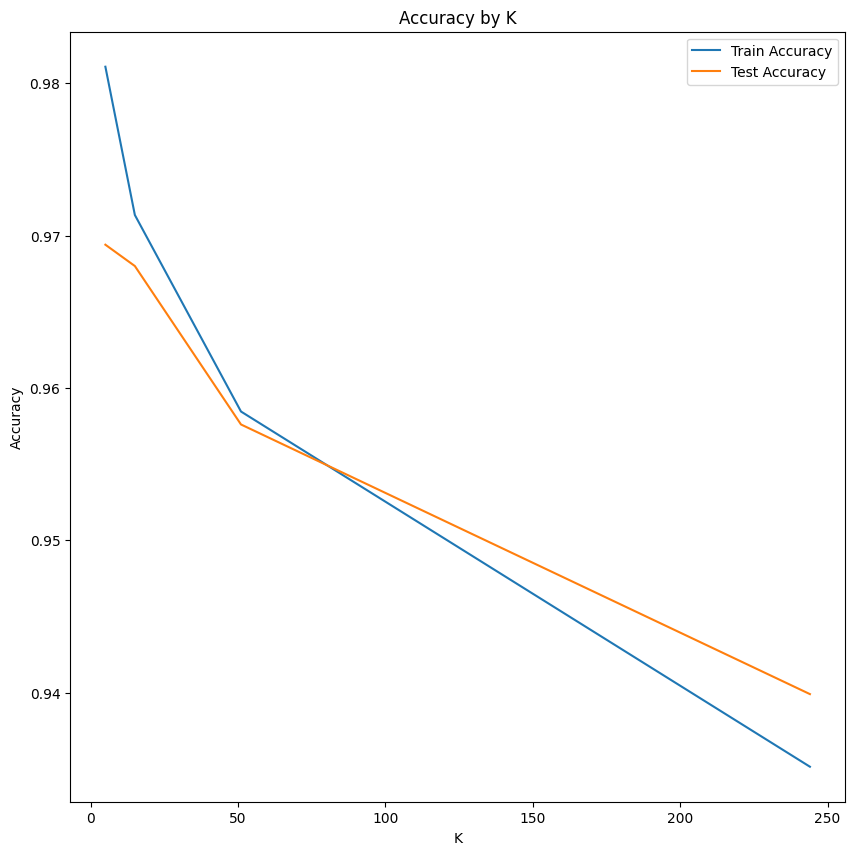

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_values, train_accuracies, label='Train Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy by K')
plt.legend()
plt.show()


## Question 6

### Normalization

In [ ]:
x_train_normalized = x_train_pca / 255.0
x_test_normalized = x_test_pca / 255.0

x_train_normalized.shape, x_test_normalized.shape

((60000, 20), (10000, 20))

### Normalized KNeighbors Classifier Training

In [ ]:
train_accuracies_normalized = []
test_accuracies_normalized = []

for k in k_values:
  model_normalized = KNeighborsClassifier(n_neighbors=k)
  model_normalized.fit(x_train_normalized, y_train)

  y_train_pred_normalized = model_normalized.predict(x_train_normalized)
  y_test_pred_normalized = model_normalized.predict(x_test_normalized)

  train_accuracy_normalized = accuracy_score(y_train, y_train_pred_normalized)
  test_accuracy_normalized = accuracy_score(y_test, y_test_pred_normalized)

  train_accuracies_normalized.append(train_accuracy_normalized)
  test_accuracies_normalized.append(test_accuracy_normalized)

  print(f"K: {k}, Train Accuracy: {train_accuracy_normalized}, Test Accuracy: {test_accuracy_normalized}")

K: 5, Train Accuracy: 0.9810833333333333, Test Accuracy: 0.9694
K: 15, Train Accuracy: 0.97135, Test Accuracy: 0.968
K: 51, Train Accuracy: 0.95845, Test Accuracy: 0.9576
K: 244, Train Accuracy: 0.9351333333333334, Test Accuracy: 0.9399


### Accuracy By K Line Plot

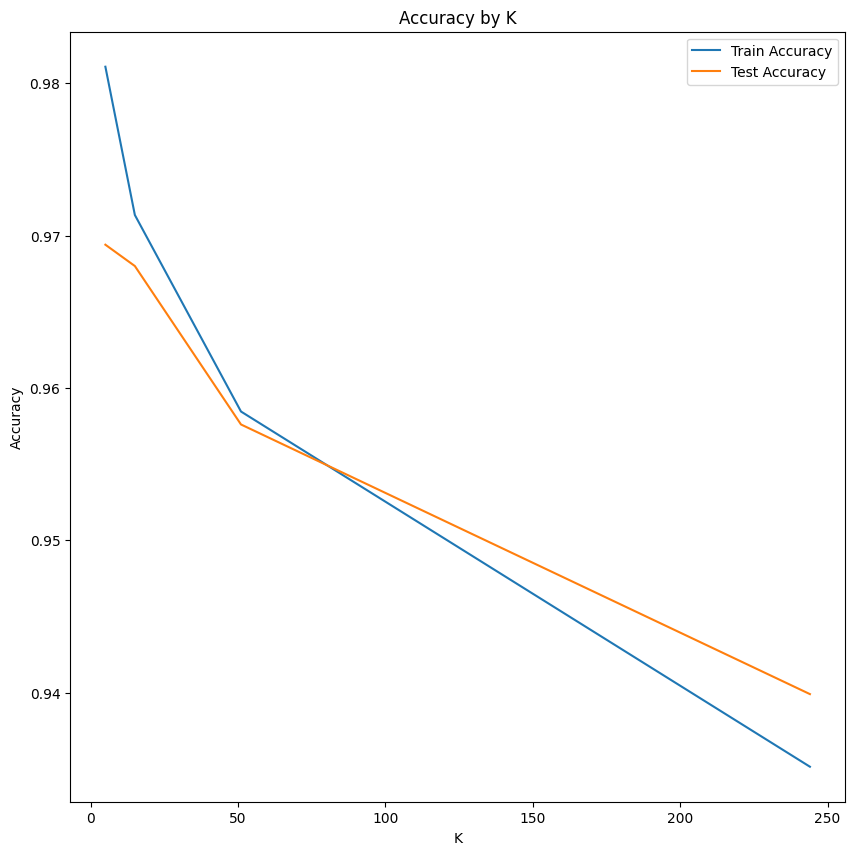

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_values, train_accuracies_normalized, label='Train Accuracy')
plt.plot(k_values, test_accuracies_normalized, label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy by K')
plt.legend()
plt.show()


### Observation

Γνωρίζουμε ότι η κλίμακα των χαρακτηριστικών επηρεάζει άμεσα την ευκλείδια απόσταση στην οποία βασίζεται ο KNN. Συνεπώς, με την εφαρμογή normalization όλα τα χαρακτηριστικά συμβάλλουν ισότιμα στους υπολογισμούς αποστάσεων. Ωστόσο, στο παράδειγμα μας, όλα τα χαρακτηριστικά του MNIST έχουν από την αρχή την ίδια κλίμακα, οπότε μετά την κανονικοποίηση των δεδομένων, οι τιμές περιορίστηκαν στο διάστημα [0, 1], αλλά συνεχίζουν να συμβάλλουν όπως και πριν στους υπολογισμούς. Γι αυτό το λόγο, η εφαρμογή του KNN στα normalized sets έδωσε τα ίδια αποτελέσματα με την ερφαρμογή στα μη normalized sets. Επομένως, η κανονικοποίηση δεν αλλάζει τη σχετική απόσταση μεταξύ των σημείων, άρα δεν αλλάζει τους κοντινότερους γείτονες και το KNN αποδίδει το ίδιο πριν και μετά την κανονικοποίηση.

## Question 7

### Loading Image

In [ ]:
image = Image.open('digit.png').convert('L')
img = np.array(image)
image_vector = img.reshape(1, 28*28)
image_pca = pca.transform(image_vector)
image_normalized = image_pca/ 255

image_normalized.shape

(1, 20)

### Best Model Prediction

Predicted digit: 3


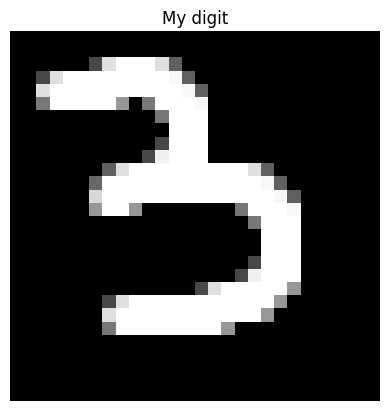

In [ ]:
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(x_train_normalized, y_train)
prediction = best_model.predict(image_normalized)
print("Predicted digit:", prediction[0])
plt.imshow(img, cmap='gray')
plt.title("My digit")
plt.axis('off')
plt.show()